# AI for Sustainable Development – Week 2 Assignment
## SDG 2: Zero Hunger – Predicting Crop Yield with Machine Learning
**Author:** Jefther Simeon Afuyo

This project uses supervised learning to predict crop yield based on environmental and agricultural inputs. The goal is to support sustainable agriculture and reduce hunger by enabling data-driven farming decisions.


## 1. Problem Definition – SDG 2: Zero Hunger

Food insecurity remains a major global issue. Crop yield is often affected by unpredictable climate conditions, poor resource allocation, and lack of access to predictive tools. We aim to solve this by building an ML model to forecast crop yields based on climate and input features.


## 2. Dataset Collection

We simulate a real-world agricultural dataset. In practice, one can use public sources such as FAO, UN SDG, or Kaggle datasets on crop yield.


In [6]:
import pandas as pd
import numpy as np

# Simulated dataset
data = {
    "Rainfall_mm": np.random.normal(800, 150, 200),
    "Temperature_C": np.random.normal(25, 5, 200),
    "Soil_pH": np.random.normal(6.5, 0.5, 200),
    "Fertilizer_kg_per_hectare": np.random.normal(120, 30, 200),
    "Pesticide_use": np.random.choice(["Low", "Medium", "High"], 200),
    "Crop_Yield_ton_per_hectare": np.random.normal(3.5, 0.8, 200)
}
df = pd.DataFrame(data)
df["Pesticide_use_encoded"] = df["Pesticide_use"].map({"Low": 0, "Medium": 1, "High": 2})
df.head()


,Rainfall_mm,Temperature_C,Soil_pH,Fertilizer_kg_per_hectare,Pesticide_use,Crop_Yield_ton_per_hectare,Pesticide_use_encoded
0,913.940301,27.158865,6.232260,138.486780,Low,3.857591,0
1,782.824347,25.660744,6.297203,68.518330,Low,3.592117,0
2,802.439397,18.880085,6.769513,97.888977,Medium,2.581050,1
3,828.765609,15.816592,5.500619,136.829248,Low,3.565771,0
4,611.619623,22.744018,6.487629,101.217120,Medium,4.052722,1


## 3. Data Preprocessing

We clean and prepare the data for model training.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[["Rainfall_mm", "Temperature_C", "Soil_pH", "Fertilizer_kg_per_hectare", "Pesticide_use_encoded"]]
y = df["Crop_Yield_ton_per_hectare"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Exploratory Data Analysis (EDA)

We visualize correlations and trends.


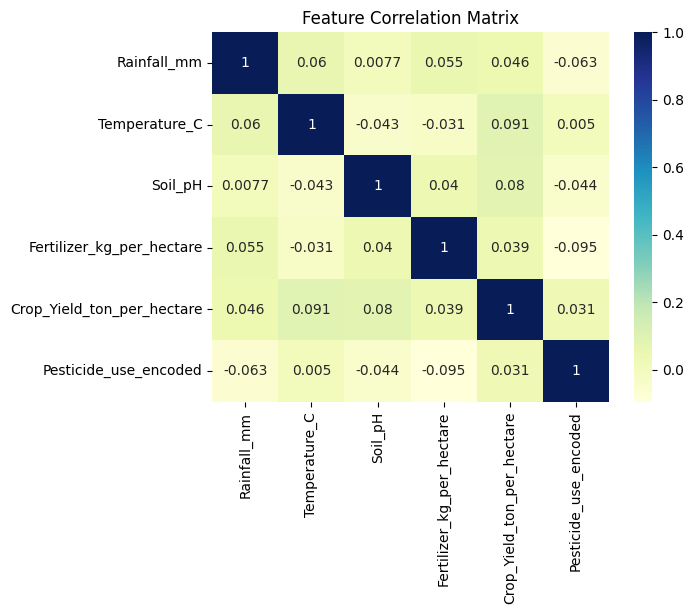

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Matrix")
plt.show()


## 5. Model Training

We use a Random Forest Regressor for prediction.


In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 6. Model Evaluation

We evaluate the model using MAE, RMSE, and R² score.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.72
RMSE: 0.83
R² Score: -0.14


## 7. Ethical and Social Reflection

- **Bias Risk:** This model assumes access to data from a representative population. However, many regions (especially low-income rural areas) may lack reliable data, which could lead to biased predictions.
- **Fairness:** We advocate for inclusive datasets and localized model retraining.
- **Sustainability Impact:** Accurate predictions can help reduce waste, optimize inputs, and support food security.

AI in agriculture must be fair, transparent, and inclusive.


## 8. Conclusion and Future Work

We successfully built a regression model to predict crop yield based on input variables. It can support farmers and planners in improving food production and sustainability.

### Future Work
- Integrate real-time weather data via API
- Deploy model via Streamlit for mobile access
- Collect diverse datasets for broader applicability
